In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist
import numpy as np
import pm4py

In [2]:
import shap
from SHAP_utils import calculateSHAP_values

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
sepsis_log=pm4py.read_xes("./Data/sepsis/sepsis.xes")

ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1714.08it/s]


In [4]:
dataset_sepsis=pd.read_csv("./Data/sepsis/mined_sepsis_confidences_SIRS2OrMore.csv",index_col=0)

In [5]:
dataset_sepsis = dataset_sepsis.set_index("case:concept:name")

In [6]:
X=dataset_sepsis.drop(columns=["Class"])

y=dataset_sepsis['Class']

In [7]:
le = LabelEncoder()
y_transformed = le.fit_transform(y)
le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
cols=X.columns.to_list()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_transformed,
                                                    test_size=0.2,
                                                    stratify=y_transformed,
                                                    shuffle=True,#disorder the data
                                                    random_state=0)

In [8]:
import joblib

In [9]:
route="11-26-2025_17-39-58"
clf=joblib.load("./results/Ours/sepsis/"+route+"/clf_val0.2.joblib")

In [10]:
boundarycasesTrueAndFalse=pd.read_csv("./results/Ours/sepsis/"+route+"/boundaryCases_ClassesSIRS-False-SIRS-True.csv")

In [11]:
boundaryCases=dataset_sepsis.loc[boundarycasesTrueAndFalse["case:concept:name"]]

In [12]:
case_id_false=boundaryCases[boundaryCases["Class"]=="SIRS-False"].index[0]
case_id_true=boundaryCases[boundaryCases["Class"]=="SIRS-True"].index[0]

In [13]:
instanceClassTrue=X.loc[[case_id_true]]
instanceClassFalse=X.loc[[case_id_false]]

In [14]:
import xgboost as xgb

In [15]:
matrix_classTrue=xgb.DMatrix(instanceClassTrue)

In [16]:
matrix_classFalse=xgb.DMatrix(instanceClassFalse)

In [17]:
clf.predict(matrix_classFalse)

array([0.25630426], dtype=float32)

In [18]:
clf.predict(matrix_classTrue)

array([0.5612955], dtype=float32)

In [19]:
instanceClassFalse

,'Absence(Admission IC)','Absence(Admission NC)','Absence(CRP)','Absence(ER Registration)','Absence(ER Sepsis Triage)','Absence(ER Triage)','Absence(IV Antibiotics)','Absence(IV Liquid)','Absence(LacticAcid)','Absence(Leucocytes)',...,"'Succession(Return ER, ER Triage)'","'Succession(Return ER, IV Antibiotics)'","'Succession(Return ER, IV Liquid)'","'Succession(Return ER, LacticAcid)'","'Succession(Return ER, Leucocytes)'","'Succession(Return ER, Release A)'","'Succession(Return ER, Release B)'","'Succession(Return ER, Release C)'","'Succession(Return ER, Release D)'","'Succession(Return ER, Release E)'"
case:concept:name,,,,,,,,,,,,,,,,,,,,,
TF,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [20]:
sepsis_log[sepsis_log["case:concept:name"]==case_id_true]["concept:name"]

2933     ER Registration
2934           ER Triage
2935    ER Sepsis Triage
2936                 CRP
2937          Leucocytes
2938        Admission NC
2939          Leucocytes
2940                 CRP
2941                 CRP
2942          Leucocytes
2943                 CRP
2944          Leucocytes
2945          Leucocytes
2946                 CRP
2947                 CRP
2948          Leucocytes
2949           Release A
Name: concept:name, dtype: object

In [21]:
sepsis_log[sepsis_log["case:concept:name"]==case_id_false]["concept:name"]

2300     ER Registration
2301           ER Triage
2302    ER Sepsis Triage
2303                 CRP
2304          Leucocytes
2305        Admission NC
2306          Leucocytes
2307                 CRP
2308          Leucocytes
2309          Leucocytes
2310                 CRP
2311                 CRP
2312          Leucocytes
2313           Release A
2314                 CRP
2315          Leucocytes
Name: concept:name, dtype: object

In [22]:
instanceClassTrue

,'Absence(Admission IC)','Absence(Admission NC)','Absence(CRP)','Absence(ER Registration)','Absence(ER Sepsis Triage)','Absence(ER Triage)','Absence(IV Antibiotics)','Absence(IV Liquid)','Absence(LacticAcid)','Absence(Leucocytes)',...,"'Succession(Return ER, ER Triage)'","'Succession(Return ER, IV Antibiotics)'","'Succession(Return ER, IV Liquid)'","'Succession(Return ER, LacticAcid)'","'Succession(Return ER, Leucocytes)'","'Succession(Return ER, Release A)'","'Succession(Return ER, Release B)'","'Succession(Return ER, Release C)'","'Succession(Return ER, Release D)'","'Succession(Return ER, Release E)'"
case:concept:name,,,,,,,,,,,,,,,,,,,,,
LH,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [24]:
shap_values, explainer=calculateSHAP_values(clf, X)

In [25]:
def plotTop10features(shap_values, case, X, explainer):
    index_instance_class=X.index.get_indexer([case])[0]
    shap_values_instance=shap_values[index_instance_class]
    expected_value=explainer.expected_value#expected value of the class
    class_instance_all_values=X.loc[case]
    shap.waterfall_plot(shap.Explanation(values=shap_values_instance, 
                                     base_values=expected_value, 
                                     data=class_instance_all_values),
                                     max_display=10,
                                     show=True)

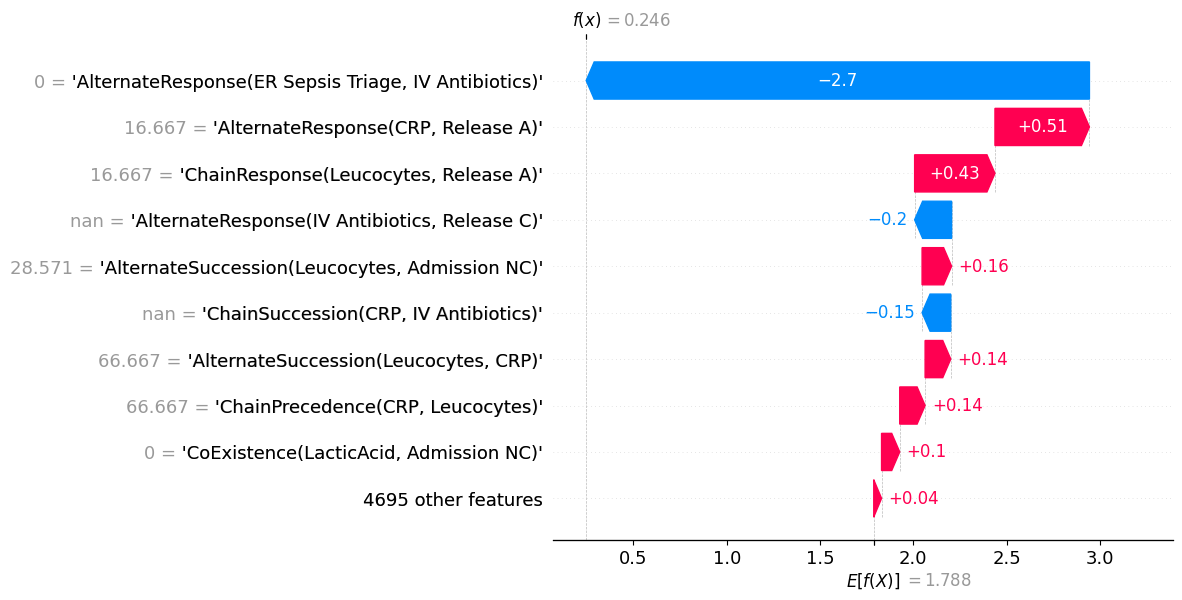

In [26]:
plotTop10features(shap_values=shap_values, 
                  case=instanceClassTrue.index[0],
                  X=X,
                  explainer=explainer)

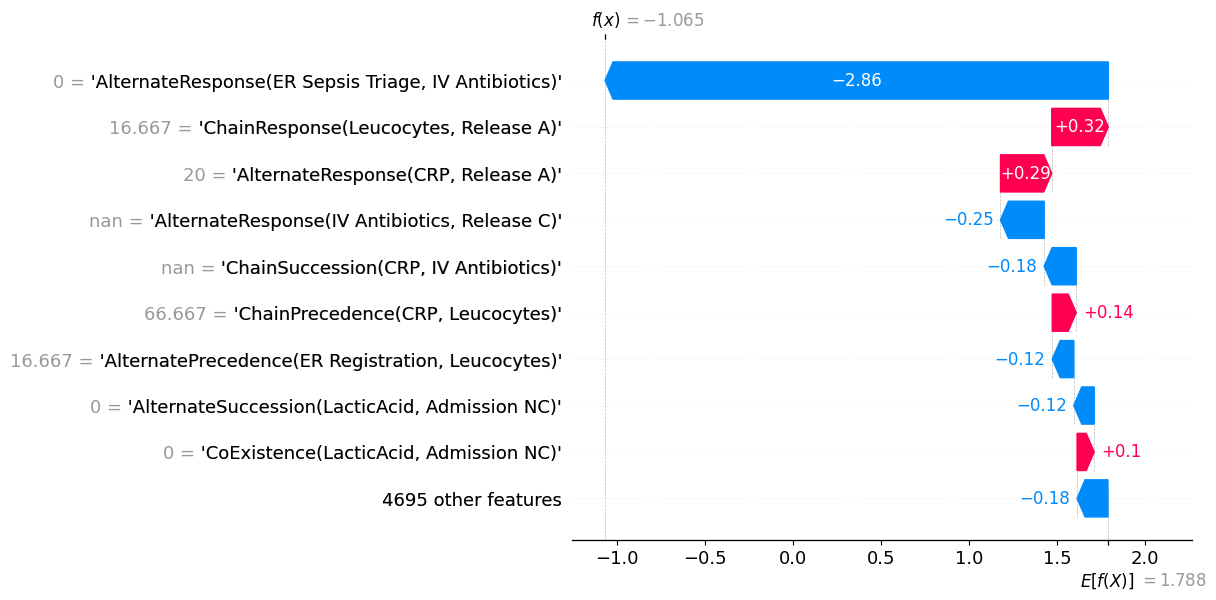

In [27]:
plotTop10features(shap_values=shap_values, 
                  case=instanceClassFalse.index[0],
                  X=X,
                  explainer=explainer)